# Multi-layer Perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Passo 1. Carregamento os dados

In [2]:
df = pd.read_csv('../../dados/processados/2015_clean.csv')

In [3]:
df.head()

,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,PC_FORMACAO_DOCENTE,...,TP_AEE_1.0,TP_ATIVIDADE_COMPLEMENTAR_0.0,TP_ATIVIDADE_COMPLEMENTAR_1.0,TP_LOCALIZACAO_DIFERENCIADA_0.0,TP_LOCALIZACAO_DIFERENCIADA_1.0,TP_LOCALIZACAO_DIFERENCIADA_2.0,TP_LOCALIZACAO_DIFERENCIADA_3.0,TP_LOCALIZACAO_DIFERENCIADA_4.0,TP_LOCALIZACAO_DIFERENCIADA_6.0,VALOR_FALTANTE
0,591.64,652.34,604.53,627.66,732.00,137.0,0.0,130.0,94.89,67.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,458.46,533.51,472.62,459.72,507.82,20.0,1.0,17.0,85.00,58.3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,529.05,583.87,547.11,507.22,652.43,39.0,0.0,37.0,94.87,67.7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,508.74,586.45,531.35,529.87,591.84,55.0,1.0,49.0,89.09,56.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,523.38,591.66,563.45,528.93,583.48,26.0,0.0,23.0,88.46,72.7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Passo 2. Divisão do dataframe

Primeiramente, o dataframe foi dividido em dois, um contendo as variáveis independentes e o outro contendo as variáveis dependentes. A variável dependente é a nota média de redação. As outras notas foram removidas.

In [4]:
X = df.drop(['NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED'], axis=1)
y = df['NU_MEDIA_RED']

Então, dividiu-se o dataframe em dados de treino e dados de teste. Nesse caso, a proporção aplicada é de 80% para treino e 20%  para teste.

In [6]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3. Padronização dos dados

Para o uso de Redes Neurais, o algoritmo espera dados padronizados ou normalizados. Essa padronização foi feita com a técnica min-max.

In [7]:
# Padronização dos dados - Redes Neurais
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# Passo 4. Treinamento do modelo

## Método 1. Sem mudança nos hiperparâmetros

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=42)
mlp_reg.fit(X_train_transformed, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

## Método 2. Busca dos hiperparâmetros com grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes' : [(195, 98,), (200, 100,), (195,), (100,)],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]
}

# cv é o número de folds usados no cross-validation
mlp_gs = GridSearchCV(MLPRegressor(random_state=42), param_grid, n_jobs=-1, cv=5, verbose=10)

In [ ]:
# Fit nos dados de treino
mlp_gs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001

É possível visualizar os parâmetros do melhor modelo encontrado no grid search:

In [ ]:
mlp_gs.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (195,)}

## Backup dos modelos

In [ ]:
import joblib

# Sem tunagem
# joblib.dump(mlp_reg, '../../modelos/mlp_reg.joblib')

# GridSearch
# joblib.dump(mlp_gs, '../../modelos/mlp_gs.joblib')

# Recuperando
mlp_reg = joblib.load('../../modelos/mlp_reg.joblib')
mlp_gs = joblib.load('../../modelos/mlp_gs.joblib')

# Passo 5. Avaliação do Modelo

Foram aplicadas três métricas para avaliar o modelo de regressão:

- RMSE (Root Mean Squared Error)

- R2 (coefficient of determination)

- MAE (Mean Absolute Error)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_preds = []
rmse = []
r2 = []
mae = []

for model in [mlp_reg, mlp_gs]:
  pred = model.predict(X_test_transformed)
  y_preds.append(pred)
  rmse.append(mean_squared_error(y_test, pred, squared=False))
  r2.append(r2_score(y_test, pred))
  mae.append(mean_absolute_error(y_test, pred))

In [ ]:
for i, model in enumerate(['Sem ajuste', 'GridSearch']):
  print(model)
  print('\t RMSE:', rmse[i])
  print('\t MAE:', mae[i])
  print('\t R2:', r2[i])

Sem ajuste
	 RMSE: 40.59290068837168
	 MAE: 30.554928968751753
	 R2: 0.721368666717964
GridSearch
	 RMSE: 40.673188786198324
	 MAE: 30.394401697138996
	 R2: 0.7202653751186175


O gráfico abaixo é uma relação dos valores reais com os valores preditos. A linha vermelha é uma referência (função identidade) para a posição ideal dos valores (valor predito = valor real).

## Multi-layer Perceptron sem mudança nos hiperparâmetros

<Figure size 432x288 with 0 Axes>

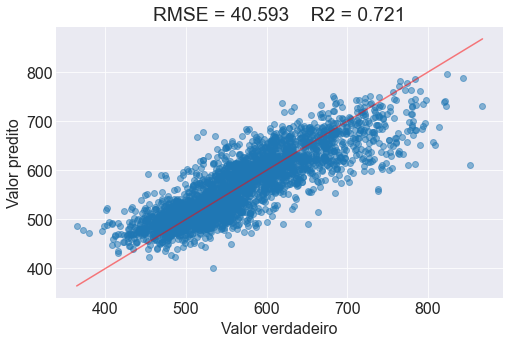

In [12]:
plt.rcParams.update({'font.size':16})
plt.style.use('seaborn-darkgrid')
plt.tight_layout()

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

x = np.linspace(y_test.min(), y_test.max()+1)
ax.plot(x, x, c='r', alpha=0.5)
ax.set(xlabel='Valor verdadeiro', ylabel='Valor predito')

ax.scatter(y_test, y_preds[0], alpha=0.5)
ax.set_title('RMSE = {0:.5}    R2 = {1:.3}'.format(rmse[0], r2[0]))
plt.savefig('../../graficos/modelos/mlp_sa.pdf')

## Multi-layer Perceptron com grid search

<Figure size 432x288 with 0 Axes>

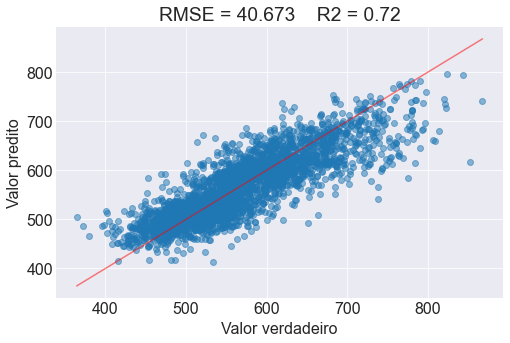

In [13]:
plt.tight_layout()

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

x = np.linspace(y_test.min(), y_test.max()+1)
ax.plot(x, x, c='r', alpha=0.5)
ax.set(xlabel='Valor verdadeiro', ylabel='Valor predito')

ax.scatter(y_test, y_preds[1], alpha=0.5)
ax.set_title('RMSE = {0:.5}    R2 = {1:.3}'.format(rmse[1], r2[1]))
plt.savefig('../../graficos/modelos/mlp_gs.pdf')